<a href="https://colab.research.google.com/github/alexander-toschev/mbzuai-course/blob/main/MislabeledData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
# Enable GPU acceleration BEFORE other TensorFlow operations
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU acceleration enabled")
else:
    print("No GPU found, running on CPU")

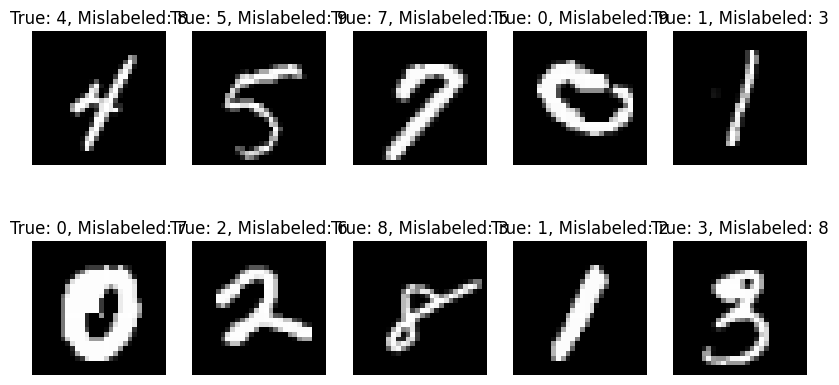

Original Sentiment Labels (First 10): [1 0 0 1 0 0 1 0 1 0]
Mislabeled Sentiment Labels (First 10): [1 0 1 1 0 0 1 1 1 0]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fit MNIST on clean labels...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8129 - loss: 7.7152 - val_accuracy: 0.8787 - val_loss: 0.5351
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8938 - loss: 0.4622 - val_accuracy: 0.9173 - val_loss: 0.3692
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9219 - loss: 0.3094 - val_accuracy: 0.9363 - val_loss: 0.2670
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9387 - loss: 0.2355 - val_accuracy: 0.9388 - val_loss: 0.2885
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9438 - loss: 0.2164 - val_accuracy: 0.9418 - val_loss: 0.2632
Clean Test Accuracy: 0.9418
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6267 - loss: 1.6740 - val_accuracy: 0.9063 - val_loss: 0.5286
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7193 - loss: 1.2569 - val_accuracy: 0.9063 - val_loss: 0.4869
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6991 - loss: 0.5860 - val_accuracy: 0.8570 - val_loss: 0.3318
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8820 - loss: 0.2829 - val_accuracy: 0.8726 - val_loss: 0.2959
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9143 - loss: 0.2193 - val_accuracy: 0.8759 - val_loss: 0.2930
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9318 - loss: 0.1844 - val_accuracy: 0.8532 - val_loss: 0.3532
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9388 - loss: 0.1646 - val_accuracy: 0.8698 - val_loss: 0.3245
Clean Test Accuracy: 0.8698
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7593 - loss: 0.6757 - val_accuracy: 0.8546 - val_loss: 0.4044
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7682 - loss: 0.5409 - val_accuracy: 0.8584 - val_loss: 0.4109
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7782 - loss: 0.521

In [7]:


from tensorflow import keras
from tensorflow.keras.datasets import mnist, imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to introduce mislabeling
def introduce_mislabeling(y, percentage, num_classes):
    num_mislabel = int(len(y) * percentage / 100)
    mislabel_indices = np.random.choice(len(y), num_mislabel, replace=False)
    y_mislabeled = y.copy()
    for idx in mislabel_indices:
        original_label = y[idx]
        new_label = np.random.choice([l for l in range(num_classes) if l != original_label])
        y_mislabeled[idx] = new_label
    return y_mislabeled, mislabel_indices

# Load and modify MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
y_train_mislabeled_mnist, mislabel_indices_mnist = introduce_mislabeling(y_train_mnist, 20, 10)

# Show some original vs mislabeled MNIST examples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = mislabel_indices_mnist[i]
    # Use x_train_mnist instead of x_train for MNIST data
    ax.imshow(x_train_mnist[idx], cmap='gray')
    # Use y_train_mnist and y_train_mislabeled_mnist for MNIST labels
    ax.set_title(f"True: {y_train_mnist[idx]}, Mislabeled: {y_train_mislabeled_mnist[idx]}")
    ax.axis('off')
plt.show()

# Load and modify IMDB dataset
num_words = 10000  # Only consider top 10,000 words
max_len = 200  # Limit the number of words per review

(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = imdb.load_data(num_words=num_words)
x_train_imdb = pad_sequences(x_train_imdb, maxlen=max_len)
y_train_mislabeled_imdb, mislabel_indices_imdb = introduce_mislabeling(y_train_imdb, 20, 2)



# Show some original vs mislabeled IMDB examples
print("Original Sentiment Labels (First 10):", y_train[:10])
print("Mislabeled Sentiment Labels (First 10):", y_train_mislabeled[:10])

# Simple model for MNIST
with tf.device('/GPU:0'):
    model_mnist = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Evaluate before mislabeling
    print("Fit MNIST on clean labels...")
    # Use the correct MNIST test data
    model_mnist.fit(x_train_mnist, y_train_mnist, epochs=5, validation_data=(x_test_mnist, y_test_mnist))
    score_clean = model_mnist.evaluate(x_test_mnist, y_test_mnist, verbose=0)
    print(f"Clean Test Accuracy: {score_clean[1]:.4f}")

    # Train and evaluate on mislabeled data
    model_mnist.fit(x_train_mnist, y_train_mislabeled_mnist, epochs=5, validation_data=(x_test_mnist, y_test_mnist))
    print("Evaluating MNIST on mislabeled data...")
    score_mislabeled = model_mnist.evaluate(x_test_mnist, y_test_mnist, verbose=0)
    print(f"Mislabeled Test Accuracy: {score_mislabeled[1]:.4f}")

# Simple model for IMDB sentiment analysis
with tf.device('/GPU:0'):
    model_imdb = keras.Sequential([
        keras.layers.Embedding(num_words, 32, input_length=max_len),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model_imdb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Evaluate before mislabeling
    print("Evaluating IMDB on clean labels...")
    model_imdb.fit(x_train, y_train, epochs=5, validation_data=(pad_sequences(x_test, maxlen=max_len), y_test))

    score_clean_imdb = model_imdb.evaluate(pad_sequences(x_test, maxlen=max_len), y_test, verbose=0)
    print(f"Clean Test Accuracy: {score_clean_imdb[1]:.4f}")

    # Train and evaluate on mislabeled data
    model_imdb.fit(x_train, y_train_mislabeled, epochs=5, validation_data=(pad_sequences(x_test, maxlen=max_len), y_test))
    print("Evaluating IMDB on mislabeled data...")
    score_mislabeled_imdb = model_imdb.evaluate(pad_sequences(x_test, maxlen=max_len), y_test, verbose=0)
    print(f"Mislabeled Test Accuracy: {score_mislabeled_imdb[1]:.4f}")